In [27]:
import numpy as np
from numpy import array,linspace,arange,meshgrid,exp,log,sqrt,cos,sin,tan,arctan,pi

from scipy.integrate import quad,dblquad,tplquad
import matplotlib.pyplot as plt

### Anonymous functions

We learned how to define functions with the `def` keyword.

In [3]:
def f(x):
    return x**2
f

<function __main__.f(x)>

but sometimes it's useful to specify a function in Python without giving it a name. For this we use `lambda` notation.

In [4]:
g = lambda x: x**2

This is like saying "g is the function that squares things".

In [9]:
g(5)

25

This notation comes in handy for functions that take functions as arguements. This brings us to the real subject of this notebook.

# Definite Integrals

We want to evaluate expressions like $$\int_a^bf(x)\,dx.$$

We know the Fundamental Theorem of Calculus tells us to find an antiderivative of $f$ and evaluate it at the endpoints, but computers aren't so good at that. What they are good at is adding and multiplying numbers.

### Riemann Sums

Recall that a definite integral is the limit of Riemann sums, multiplying the width of subinterval by the value of the function at some point inside. For example, if we divide the interval into $N$ uniform subintervals and sample at the left endpoint, we have
 
$$\int_a^bf(x)\,dx \approx \sum_{i=0}^{N-1} f(a + i\Delta x)\Delta x $$ where $\Delta x = \frac{b - a}{N}$.

In [17]:
def left_rule(f,a,b,N=1000):
    """Computes the Riemann sum of the definite integral of f from a to b
    using N (default 1000) subintervals and left endpoints."""
    dx = (b - a)/N
    return sum([f(a + i*dx) for i in range(N)])*dx

Let's try it on $\int_{-1}^1(1-x^2)\,dx$ using an anonymous function.

In [18]:
left_rule(lambda x: 1 - x**2,-1,1)

1.3333319999999993

There are a lot of other (read: "smarter") ways to approximate integrals in this way. See the [Simpson's Rule](../extras/SimpsonsRule.ipynb) notebook to explore some more. 

This problem is (more or less) solved in the `scipy.integrate` library which builds on algorithms that have been around since the early days of computing. How does it worK? Knock off an afternoon with [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature).

In [22]:
quad(lambda x: 1 - x**2,-1,1)

(1.3333333333333335, 1.4802973661668755e-14)

The first number is the estimate, awfully close to the exact $\frac43$. The second is the error estimate. 

**Note** The `e` in the estimate is not the natural base $e$ but the **e**xponent from usual scientific notation. `3.14e-12`$=3.14\times10^{-12}$.

One can get the first element of any tuple (or list or other iterable) by appending `[0]`.

In [26]:
quad(lambda x: 2*sqrt(1 - x**2),-1,1)[0] # seem familiar?

3.1415926535897967

## Multiple integration

A double integral is easily enough computed via `dblquad` which performs an iterated integral and works as you might expect **except for the quirk that the integrand's arguments must come in the order of integration**, i.e., the inside variable first. So a double integral like 

$$\int_a^b \int_{f(x)}^{g(x)} h(x,y)\,dy\,dx $$

would be coded like 

```dblquad(lambda y,x: h(x,y),a,b,f,g)```

assuming all variables defined as expected. 

#### Example

Find the centroid of the region bounded by the $x$-axis, $x=1$ and $y=x^2$.

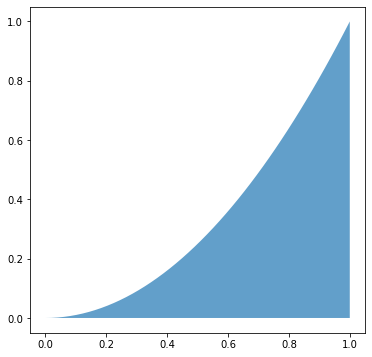

In [33]:
x = linspace(0,1,50)
plt.figure(figsize=(6,6))
plt.fill_between(x,x**2,alpha=.7);

The area is $$\int_0^1\int_0^{x^2}dy\,dx.$$

In [63]:
# the area is trivial

A,err = quad(lambda x: x**2,0,1)
A

0.33333333333333337

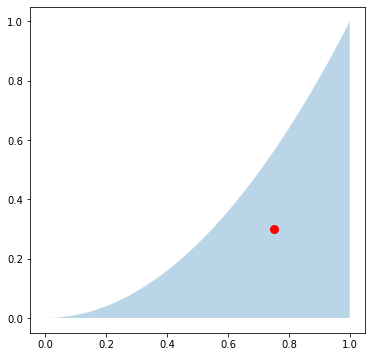

In [56]:
xbar,ybar = dblquad(lambda y,x: x,0,1,0,lambda x:x**2)[0] / A,dblquad(lambda y,x: y,0,1,0,lambda x:x**2)[0] / A

x = linspace(0,1,50)
plt.figure(figsize=(6,6))
plt.fill_between(x,x**2,alpha=.3);
plt.scatter([xbar],[ybar],s=2**6,c='r');

#### Exercise

Reverse the order of operations in $\bar x$ and $\bar y$ above. 

### Triple integrals

`tplquad`, as you may have guessed, can compute triple integrals, but again, the order or the integrand's arguments in the order of integration, from inside to outside. 

### Example

Find the centroid of the region above the surface $z=x^2 + y^2$ and below the plane $z=4$.

#### Solution

It's easy enough to argue $\bar x = \bar y = 0$. We compute 

$$ \bar z = \frac{\int_{-2}^2 \int_{-\sqrt{4 - x^2}}^{\sqrt{4 - x^2}} \int_{x^2 + y^2}^{4} z\,dz\,dy\,dx}{\int_{-2}^2 \int_{-\sqrt{4 - x^2}}^{\sqrt{4 - x^2}} \int_{x^2 + y^2}^{4}\,dz\,dy\,dx} $$

In [70]:
vol = dblquad(lambda y,x: 4 - x**2 - y**2, -2,2,
        lambda x: -sqrt(4 - x**2),lambda x: sqrt(4 - x**2))[0]

In [71]:
tplquad(lambda z,y,x: z, -2,2,
        lambda x: -sqrt(4 - x**2),lambda x: sqrt(4 - x**2),
        lambda x,y: x**2 + y**2,4)[0] / vol

2.666666666702137